In [1]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # , cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix  # , classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from scipy import integrate


In [38]:
DATA_PATH_NT = "./data/features/diegoData/properOversample/"
DATA_PATH_T = DATA_PATH_NT

In [39]:
diego_t_test = pd.read_pickle(DATA_PATH_T+"/Ttest.pickle")
diego_t_train = pd.read_pickle(DATA_PATH_T+"/Ttrain.pickle")
diego_nt = pd.read_pickle(DATA_PATH_NT+"/NT.pickle")

In [40]:
def createBinClass(df):
    df['bin_class'] = df['Class']=="SN"
    df["fact_Class"] = pd.factorize(df['bin_class'])[0]

In [41]:
# diego_t['bin_class'] = diego_t['Class']=="SN"
# diego_t["fact_Class"] = pd.factorize(diego_t['bin_class'])[0]
# diego_nt['bin_class'] = diego_nt['Class']=="SN"
# diego_nt["fact_Class"] = pd.factorize(diego_nt['bin_class'])[0]
createBinClass(diego_nt)
createBinClass(diego_t_train)
createBinClass(diego_t_test)

In [42]:
diego_t_train.head()

,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,bin_class,fact_Class
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
TranID1409030010044114444,0,SN?,13,1.12135,0.307692,0.176239,0.360298,0.394351,0.706535,0.854753,-0.552947,...,1.393948e-07,2.573913e-10,-3.677913e-13,-0.287598,-3.927273,0.681471,-0.562822,0.707972,False,0
TranID1209210010044118805,0,Flare,68,2.56960,0.352941,0.150676,0.264000,0.371657,0.446887,0.678558,10.041946,...,-7.297054e-07,4.150062e-11,2.744152e-13,-2.355343,-3.139161,0.788365,0.941645,0.322600,False,0
TranID1310250040014131234,0,SN,185,1.88140,0.297297,0.095021,0.222692,0.286157,0.424600,0.681645,3.159501,...,4.197685e-07,-2.467111e-10,-2.952595e-13,-1.412739,-3.049541,0.656324,1.700725,0.492124,True,1
TranID801010040034114166,0,Var?,26,1.27585,0.384615,0.352484,0.476246,0.602373,0.824997,0.951375,-0.590139,...,-1.531308e-06,5.664993e-12,7.185570e-13,-0.458774,-3.396739,0.686460,0.922882,0.738895,False,0
TranID1011080040044131101,0,SN,41,1.46335,0.439024,0.150511,0.259985,0.332801,0.739057,0.954815,-0.155772,...,1.428477e-06,9.526601e-12,-6.340534e-13,-0.794969,-3.238866,0.753666,0.984150,0.627376,True,1


In [43]:
diego_nt.head()

,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,bin_class,fact_Class
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
CataID1121048016765,0,non-transient,37,1.325,0.270270,0.182249,0.269822,0.325444,0.495858,0.637870,0.806118,...,5.795073e-09,1.657338e-10,1.347946e-13,-0.121108,-3.267227,0.520336,-0.213986,0.658328,False,0
CataID1121048016959,0,non-transient,162,1.285,0.333333,0.174850,0.310580,0.441875,0.635413,0.798226,-0.216866,...,1.175388e-07,5.420264e-11,-1.443238e-15,-0.027053,-3.056722,0.497320,0.158238,0.711336,False,0
CataID1112021056668,0,non-transient,25,1.090,0.440000,0.211813,0.319756,0.448065,0.540733,0.810591,-0.578216,...,2.293719e-07,-2.428915e-10,3.115327e-14,-0.402302,-3.415020,0.617377,-0.326482,0.714699,False,0
CataID1112021056680,0,non-transient,342,0.770,0.201754,0.079491,0.193561,0.286169,0.450318,0.683625,4.943506,...,1.679038e-08,2.447224e-11,-1.943614e-14,1.654544,-3.026575,0.211430,0.096149,0.745172,False,0
CataID1112021056719,0,non-transient,368,0.210,0.271739,0.133333,0.266667,0.400000,0.533333,0.800000,1.958833,...,-3.588746e-08,2.733594e-12,1.793104e-14,-0.325084,-3.024680,0.049496,0.060285,0.769558,False,0


## Shuffle the data

In [44]:
diego_t_train = diego_t_train.sample(frac=1)
diego_t_test = diego_t_test.sample(frac=1)
diego_nt = diego_nt.sample(frac=1)

# SN within transients and non-transients

In [45]:
nt_train, nt_test= train_test_split(diego_nt,test_size = 0.25)

In [46]:
all_train = pd.concat([diego_t_train,nt_train])
all_test = pd.concat([diego_t_test,nt_test])

In [47]:
all_train = all_train.sample(frac=1)
all_test = all_test.sample(frac=1)

In [48]:
features = all_train.columns[2:-2]
print(features)
y_train = np.array(all_train['fact_Class'])
y_test = np.array(all_test['fact_Class'])

Index(['amplitude', 'beyond1st', 'flux_percentile_ratio_mid20',
       'flux_percentile_ratio_mid35', 'flux_percentile_ratio_mid50',
       'flux_percentile_ratio_mid65', 'flux_percentile_ratio_mid80',
       'kurtosis', 'max_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage', 'pair_slope_trend',
       'pair_slope_trend_last_30', 'percent_amplitude',
       'percent_difference_flux_percentile', 'poly1_t1', 'poly2_t1',
       'poly2_t2', 'poly3_t1', 'poly3_t2', 'poly3_t3', 'poly4_t1', 'poly4_t2',
       'poly4_t3', 'poly4_t4', 'skew', 'small_kurtosis', 'std', 'stetson_j',
       'stetson_k'],
      dtype='object')


In [49]:
print(len(y_train))
print(len(y_test))

46583
4869


# Train the algorithm

In [50]:
clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')
clf.fit(all_train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [51]:
clf.score(all_test[features],y_test)

0.8192647360854385

In [52]:
preds = clf.predict(all_test[features])
pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])

Actual,0,1
Predicted,,
0,3949,725
1,155,40


Text(0,0.5,'precision')

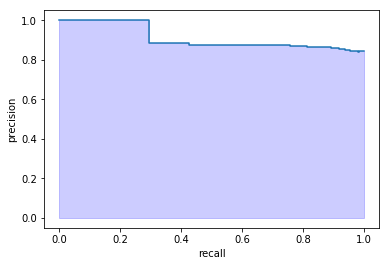

In [53]:
# plt.style.use(['dark_background'])
preds1 = clf.predict_proba(all_test[features])
precision, recall, _ = precision_recall_curve(y_test, preds1[:,0],pos_label=0)

plt.step(recall,precision)
plt.fill_between(recall, precision,step='pre', alpha=0.2,
                 color='b')
plt.xlabel('recall')
plt.ylabel('precision')

In [54]:
integrate.trapz(precision[::-1],recall[::-1])

0.8918828517315024

In [55]:

f1_score(np.array(preds),np.array(y_test))

0.08333333333333334

# SN within transients

In [66]:

all_train = diego_t_train
all_test = diego_t_test



In [74]:
all_train.head()

,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,bin_class,fact_Class
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
TranID1601301490384135528,4,HPM,13,0.201680,0.230769,0.128276,0.203179,0.368561,0.405794,0.774623,0.644358,...,-3.254815e-05,3.226448e-08,5.315882e-10,-0.963255,-3.927273,0.116035,1.064054,0.779512,False,0
TranID1004121040434181465,7,SN,12,0.821045,0.500000,0.785029,0.802570,0.816606,0.846517,0.913308,-2.315540,...,-1.168190e+02,-7.340511e-04,3.214634e-01,-0.008574,-4.033333,0.688105,6.689121,0.977076,True,1
TranID1109190121114107721,5,CV,81,2.040180,0.395062,0.119920,0.322553,0.482442,0.582825,0.889510,-0.876362,...,1.328852e-07,-3.116253e-11,-4.693852e-14,-0.018814,-3.115871,1.094954,3.378831,0.716476,False,0
TranID1006010090764153269,9,Blazar,225,1.872204,0.337778,0.127277,0.246815,0.351678,0.522938,0.767629,0.449904,...,6.540515e-09,-5.824525e-11,-6.860942e-14,-0.146151,-3.040601,0.617565,1.475649,0.720621,False,0
TranID1202111180194119491,6,SN,28,1.696602,0.464286,0.119691,0.307788,0.451805,0.608682,0.865437,-0.558828,...,-2.047051e-06,1.631758e-09,1.634193e-12,-0.471246,-3.364615,0.948155,2.168519,0.634728,True,1


In [67]:
all_train = all_train.sample(frac=1)
all_test = all_test.sample(frac=1)

In [68]:
features = all_train.columns[2:-2]
print(features)
y_train = np.array(all_train['fact_Class'])
y_test = np.array(all_test['fact_Class'])

Index(['amplitude', 'beyond1st', 'flux_percentile_ratio_mid20',
       'flux_percentile_ratio_mid35', 'flux_percentile_ratio_mid50',
       'flux_percentile_ratio_mid65', 'flux_percentile_ratio_mid80',
       'kurtosis', 'max_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage', 'pair_slope_trend',
       'pair_slope_trend_last_30', 'percent_amplitude',
       'percent_difference_flux_percentile', 'poly1_t1', 'poly2_t1',
       'poly2_t2', 'poly3_t1', 'poly3_t2', 'poly3_t3', 'poly4_t1', 'poly4_t2',
       'poly4_t3', 'poly4_t4', 'skew', 'small_kurtosis', 'std', 'stetson_j',
       'stetson_k'],
      dtype='object')


In [69]:
print(len(y_train))
print(len(y_test))


35189
1070


In [70]:
clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')
clf.fit(all_train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [71]:
clf.score(all_test[features],y_test)

0.18691588785046728

In [72]:
preds = clf.predict(all_test[features])
pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])

Actual,0,1
Predicted,,
0,138,703
1,167,62


Text(0,0.5,'precision')

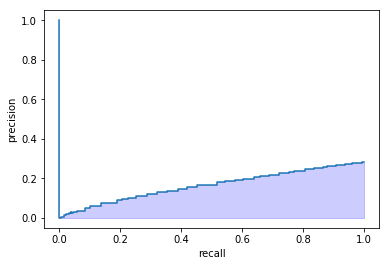

In [73]:
# plt.style.use(['dark_background'])
preds1 = clf.predict_proba(all_test[features])
precision, recall, _ = precision_recall_curve(y_test, preds1[:,0],pos_label=0)

plt.step(recall,precision)
plt.fill_between(recall, precision,step='pre', alpha=0.2,
                 color='b')
plt.xlabel('recall')
plt.ylabel('precision')

In [64]:
integrate.trapz(precision[::-1],recall[::-1])

0.16785557772464102

In [65]:
f1_score(np.array(preds),np.array(y_test))

0.12310797174571139